In [1]:
import numpy as np
import cv2

In [2]:
img = cv2.imread('moth.jpg')

In [4]:
pip install matplotlib


     |████████████████████████████████| 10.3 MB 3.8 MB/s eta 0:00:01    |███████████████████▊            | 6.3 MB 2.6 MB/s eta 0:00:02
     |████████████████████████████████| 1.2 MB 3.7 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [5]:
from matplotlib import pyplot as plt

Matplotlib is building the font cache; this may take a moment.


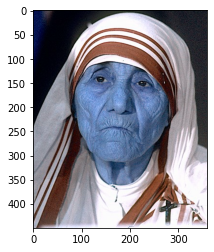

In [6]:
plt.imshow(img)
plt.show()

In [7]:
#we get bgr image

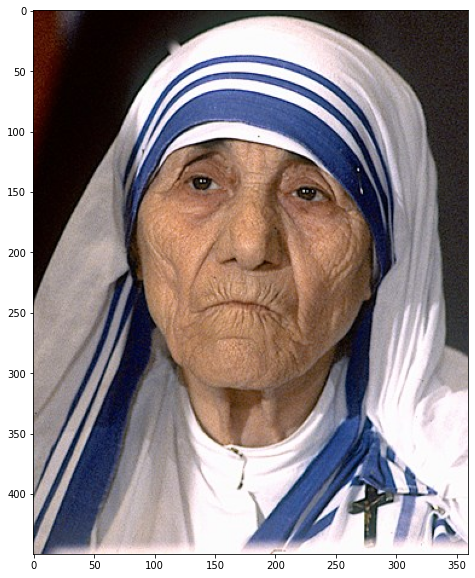

In [9]:
image = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,10))
plt.imshow(image)
plt.show()

In [10]:
#since bilateral filter has compute cost which is high we reduce the pixel

In [11]:
img_small=cv2.pyrDown(image)

In [12]:
#here we r apllying gaussian filter then remove even no.of rows then even no.of col
# pyrDown() function decreases the size to half. If we keep the original image as a base image and go on applying pyrDown function on it and keep the images in a vertical stack, it will look like a pyramid.

In [13]:
num_iter = 5
for i in range(num_iter):
    image_small = cv2.bilateralFilter(img_small,d = 9,sigmaColor = 9,sigmaSpace = 7)
    #d-kernel size,sigmacolor-colourpixelval,sigmaspace-positionalval

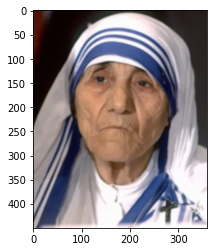

In [14]:
upgrade_image = cv2.pyrUp(image_small)
plt.imshow(upgrade_image)
plt.show()

In [15]:
#on top of above image we are creating edge lines

In [17]:
img_gray = cv2.cvtColor(upgrade_image,cv2.COLOR_RGB2GRAY)
img_blur = cv2.medianBlur(img_gray,7) #7-kernel size

In [18]:
img_edge = cv2.adaptiveThreshold(img_blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 7, 2)

In [19]:
#255-max pixel size ,aplly adaptive threshhold gaussian method ,thresh binary any val above threshold will be 1 and less than threshhold will be 0,kernel size & matrix size is 7,const val = 2 which we'll subtract from gaussian avg

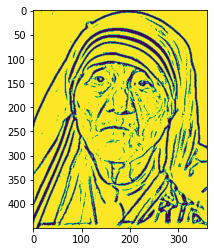

In [20]:
plt.imshow(img_edge)
plt.show()

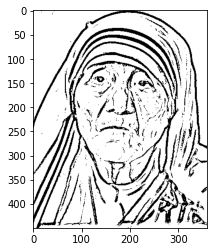

In [22]:
img_edge = cv2.cvtColor(img_edge, cv2.COLOR_GRAY2RGB)

plt.imshow(img_edge)
plt.show()
                        
                        

In [23]:
array_of_pixels = cv2.bitwise_and(image, img_edge)

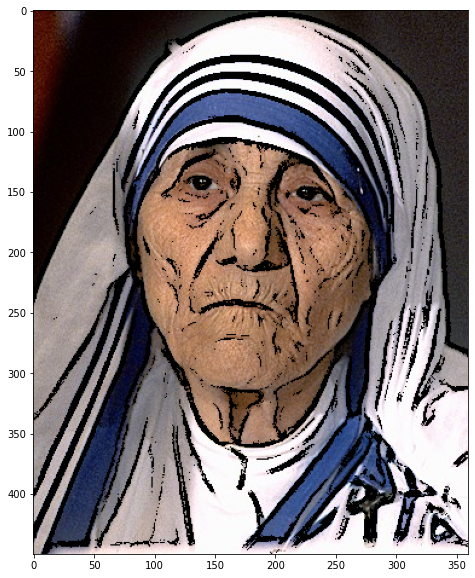

In [25]:
plt.figure(figsize= (10,10))
plt.imshow(array_of_pixels)

plt.show()